# What are Sign Languages

It is a mode of communication that does not rely on the use of spoken words but rather on non-verbal cues such as hand gestures and movements, body language, and facial expressions. Those who are deaf or hard of hearing typically communicate through the use of sign languages. Sign Languages are natural human languages that have developed wherever communities of deaf people have come together to form groups. Sign Languages are spoken by around 35 million people worldwide. Sign languages are fully developed human languages that are on a par with spoken languages at every level of linguistic organisation. This means that, just like spoken languages, sign languages have their own grammar and lexicon.

<img src="https://visionaryblog.co.in/wp-content/uploads/2022/01/7.png.webp" alt="Image" style="width:500px;height:300px;margin:auto">

### We will take a look at 2 sign languages in this notebook
##### ```1. ISL (Indian Sign Language)```
##### ```2. ASL (American Sign Language)```

Whereas the Alphabetical Signs for both of them are distinct, the Digits are identical and are represented as the same. We will also examine this notebook for instances in which the Digits do not differ.

# Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# Digit MNIST

<img src="https://www.researchgate.net/publication/334571446/figure/fig1/AS:783175043276803@1563734889936/Bangla-sign-language-digits-sample.png" alt="Image" style="width:600px;height:300px;margin:auto">

# Loading the Digit's DataSet

In [2]:
root_dir = '/kaggle/input/american-sign-language-digit-dataset/American Sign Language Digits Dataset'

image_data = []

for label in range(10):
    label_dir = os.path.join(root_dir, str(label), 'Input Images - Sign {}'.format(label))
    for image_file in os.listdir(label_dir):
        image = Image.open(os.path.join(label_dir, image_file))
        image_data.append({
            'label': label,
            'color_image': image
        })

df = pd.DataFrame(image_data)

In [3]:
df

,label,color_image
0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...,...
4995,9,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4996,9,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4997,9,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4998,9,<PIL.JpegImagePlugin.JpegImageFile image mode=...


# Data Visualization (EDA)

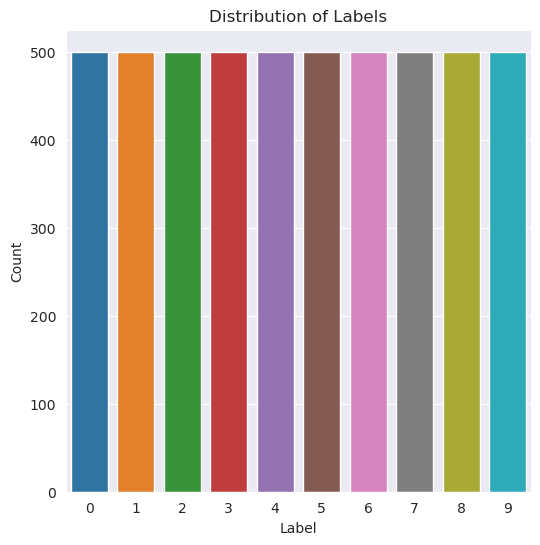

In [4]:
plt.figure(figsize=(6, 6))
sns.set_style("darkgrid")
sns.countplot(data=df,x='label')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

plt.show()

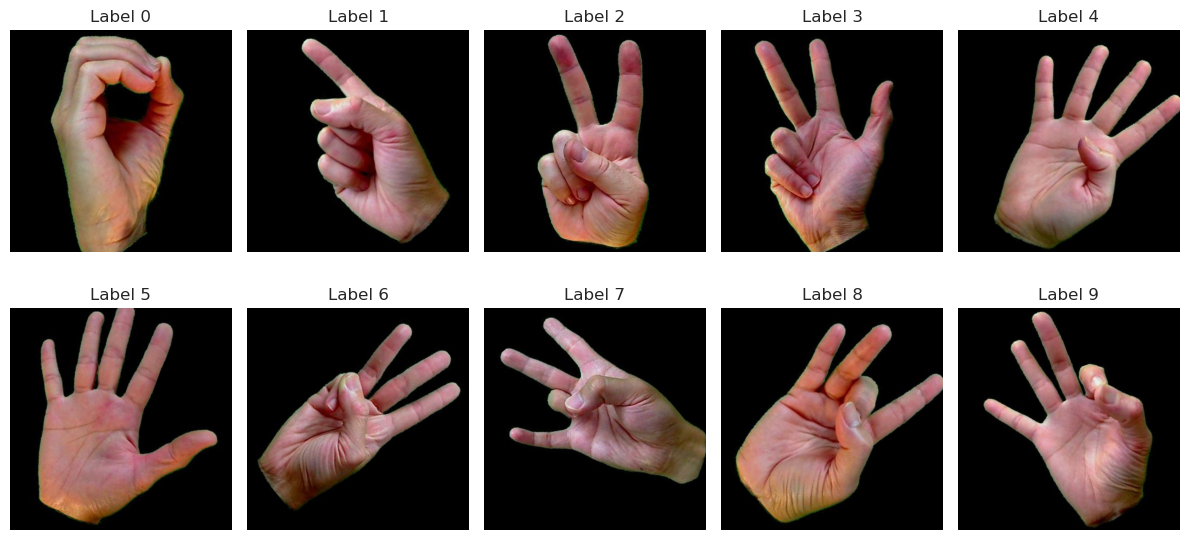

In [5]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))

for i, (label, image) in enumerate(df.groupby('label').first().reset_index()[['label', 'color_image']].itertuples(index=False)):
    ax = axs[i // 5, i % 5]
    ax.imshow(image)
    ax.set_title('Label {}'.format(label))
    ax.axis('off')

plt.axis('off')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [6]:
# Preprocessing steps
images = np.array(df['color_image'].tolist())
labels = np.array(df['label'])

In [7]:
# Resize images to desired dimensions
resized_images = []
for image in images:
    resized_image = image.resize((32, 32))  # Resize the image to the desired size
    resized_images.append(np.array(resized_image))
images = np.array(resized_images)

In [8]:
# Normalize pixel values
images = images / 255.0

# Splitting the Data into Train Test Split

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [10]:
# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model Architecture

In [11]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(50, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(25, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 75)        2100      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 75)       300       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 75)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 16, 16, 50)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 50)       2

# Data Augmentation

In [12]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

# Fitting of the Model

In [13]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.0001)
history = model.fit(datagen.flow(X_train, y_train), epochs=30, validation_data=(X_test, y_test), callbacks=[learning_rate_reduction])

Epoch 1/30


2025-02-13 16:41:52.084549: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


125/125 [==============================] - 14s 24ms/step - loss: 1.5377 - accuracy: 0.4765 - val_loss: 2.2915 - val_accuracy: 0.1450 - lr: 0.0100
Epoch 2/30
125/125 [==============================] - 3s 20ms/step - loss: 0.7219 - accuracy: 0.7628 - val_loss: 2.0471 - val_accuracy: 0.3380 - lr: 0.0100
Epoch 3/30
125/125 [==============================] - 2s 20ms/step - loss: 0.4424 - accuracy: 0.8583 - val_loss: 1.3687 - val_accuracy: 0.4960 - lr: 0.0100
Epoch 4/30
125/125 [==============================] - 2s 20ms/step - loss: 0.3371 - accuracy: 0.8950 - val_loss: 0.5665 - val_accuracy: 0.8230 - lr: 0.0100
Epoch 5/30
125/125 [==============================] - 3s 21ms/step - loss: 0.2558 - accuracy: 0.9180 - val_loss: 0.1855 - val_accuracy: 0.9510 - lr: 0.0100
Epoch 6/30
125/125 [==============================] - 3s 20ms/step - loss: 0.1943 - accuracy: 0.9442 - val_loss: 0.1023 - val_accuracy: 0.9840 - lr: 0.0100
Epoch 7/30
125/125 [==============================] - 2s 20ms/step - loss:

# Model Evaluation

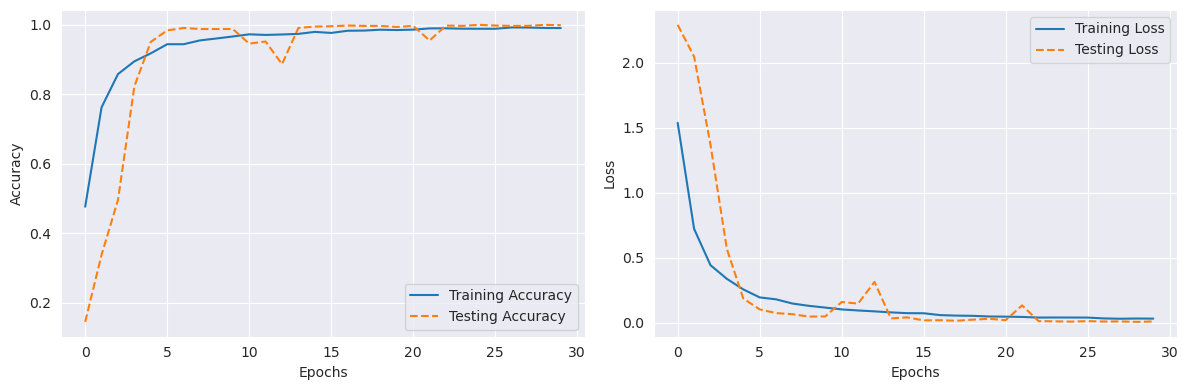

In [14]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Define plot labels and styles
plot_labels = ['Accuracy', 'Loss']
plot_styles = ['-', '--']

# Plot training and testing accuracy/loss
for i, metric in enumerate(['accuracy', 'loss']):
    train_metric = history.history[metric]
    test_metric = history.history['val_' + metric]
    axs[i].plot(train_metric, label='Training ' + metric.capitalize(), linestyle=plot_styles[0])
    axs[i].plot(test_metric, label='Testing ' + metric.capitalize(), linestyle=plot_styles[1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(plot_labels[i])
    axs[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [15]:
# Get the model's predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

32/32 [==============================] - 0s 2ms/step


In [16]:
# Create the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

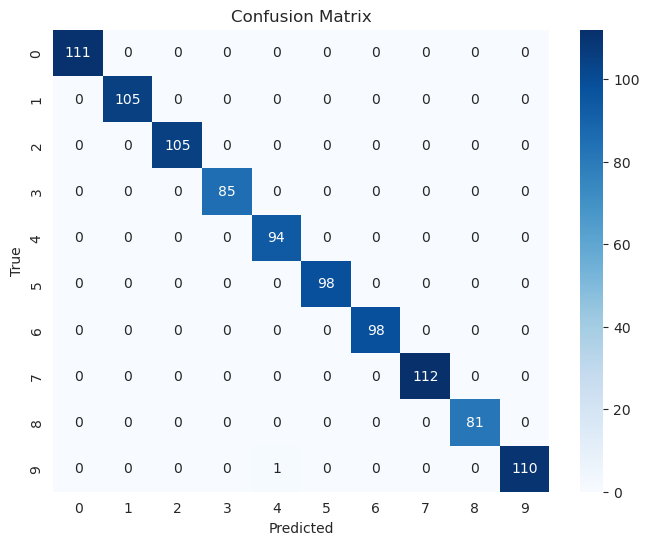

In [17]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
accuracy = model.evaluate(X_test, y_test)
print(f'validation test results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

32/32 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9990
validation test results - Loss: 0.009293926879763603 - Accuracy: 99.90000128746033%


# Saving the Model

In [19]:
model.save("digitSignLanguage.h5")

# <center> -----------------------------  END   ---------------------------</center>

# ASL (American Sign Language)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7d/American_Sign_Language_ASL.svg/1200px-American_Sign_Language_ASL.svg.png" alt="Image" style="width:600px;height:300px;margin:auto">

# Loading the Dataset

In [20]:
train_df = pd.read_csv("../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

In [21]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


# Data Visualization (EDA)

In [22]:
fig = px.histogram(train_df, x='label',color='label', title='Distribution of Labels in Training Dataset')

fig.update_layout(
    xaxis_title='Label',
    yaxis_title='Count',
    showlegend=False,
    bargroupgap=0.1,
)

fig.show()

In [23]:
fig = px.histogram(test_df, x='label',color='label', title='Distribution of Labels in Testing Dataset')

fig.update_layout(
    xaxis_title='Label',
    yaxis_title='Count',
    showlegend=False,
    bargroupgap=0.1,
)

fig.show()

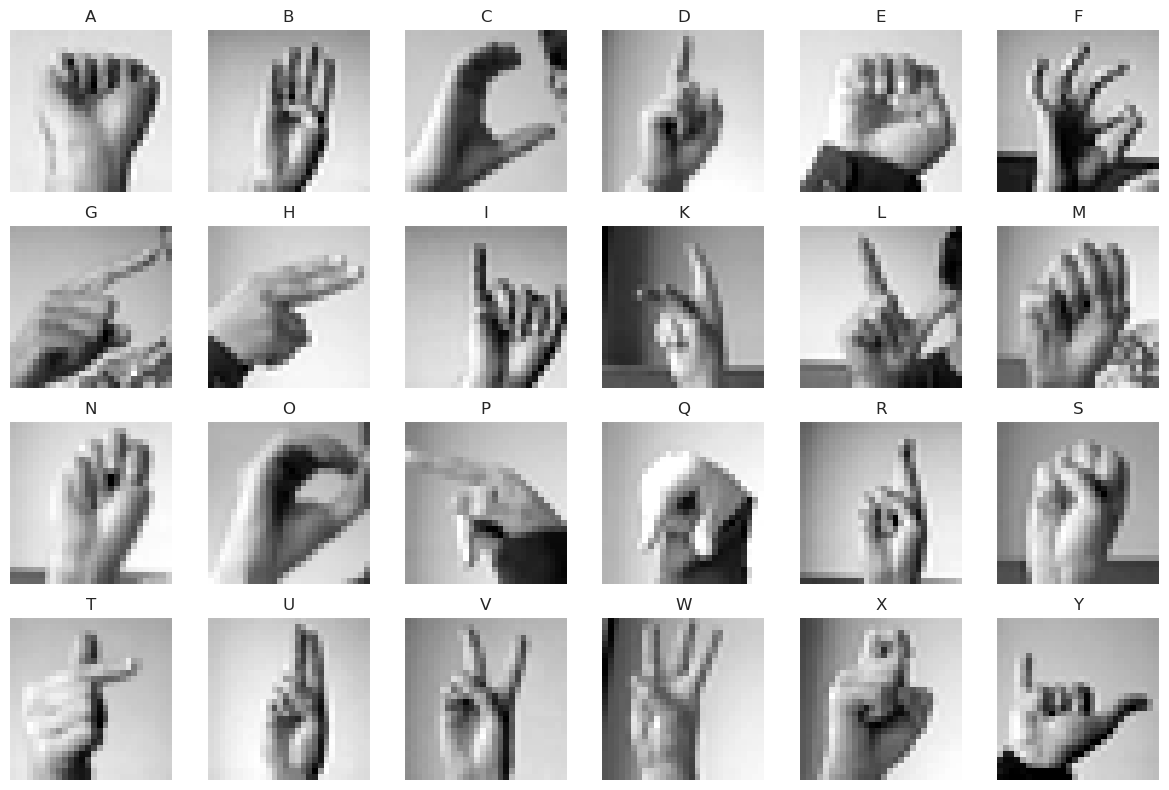

In [24]:
# Group the dataframe by the 'label' column
label_groups = train_df.groupby('label')

# Iterate over each label group and display one image
fig, axs = plt.subplots(4, 6, figsize=(12, 8))

for i, (label, group) in enumerate(label_groups):
    # Get the first image from the group
    image = group.iloc[0, 1:].values.reshape(28, 28)
    
    # Calculate the subplot index
    row = i // 6
    col = i % 6
    
    # Convert label to integer and add 65 to get ASCII value
    ascii_value = int(label) + 65
    
    # Display the image
    axs[row, col].imshow(image, cmap='gray')
    axs[row, col].set_title(chr(ascii_value))
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

# Preprocessing the Data

In [25]:
X_train = train_df.drop(labels = ["label"],axis = 1) 
y_train = train_df["label"]

In [26]:
X_test = test_df.drop(labels = ["label"],axis = 1)
y_test = test_df["label"]

In [27]:
X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')
y_train = np.array(y_train, dtype='float32')
y_test = np.array(y_test, dtype='float32')

In [28]:
# Reshape the data to match the input shape of the CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [29]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [30]:
# Convert the labels to one-hot encoded format
num_classes = 25
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27455, 28, 28, 1)
(27455, 25)
(7172, 28, 28, 1)
(7172, 25)


# Model Architecture

In [32]:
# Create the CNN model
model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(num_classes, activation = "softmax"))

# Compile the model
model.compile(optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),loss='categorical_crossentropy',metrics=['accuracy'])

# Data Augmentation

In [33]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

# Fitting of the Model

In [ ]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', patience=3,factor=0.5, min_lr=0.0001)

history = model.fit_generator(datagen.flow(X_train,y_train), epochs = 25, validation_data = (X_test,y_test), verbose = 1, callbacks=[learning_rate_reduction])

# Model Evaluation

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Define plot labels and styles
plot_labels = ['Accuracy', 'Loss']
plot_styles = ['-', '--']

# Plot training and testing accuracy/loss
for i, metric in enumerate(['accuracy', 'loss']):
    train_metric = history.history[metric]
    test_metric = history.history['val_' + metric]
    axs[i].plot(train_metric, label='Training ' + metric.capitalize(), linestyle=plot_styles[0])
    axs[i].plot(test_metric, label='Testing ' + metric.capitalize(), linestyle=plot_styles[1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(plot_labels[i])
    axs[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Get the model's predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = model.evaluate(X_test, y_test)
print(f'validation test results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

# Saving the Model

In [ ]:
model.save("americanSignLanguage.h5")

# <center> -----------------------------  END   ---------------------------</center>

# ISL (Indian Sign Language)

<img src="https://www.livelaw.in/h-upload/2019/07/09/1600x960_362025-isl.jpg" alt="Image" style="width:600px;height:400px;margin:auto">

<br>

## ```As we know that the digits for sign language are same everywhere so we are only going to train on the Indian Sign Gestures only and we are going to Train our model accourdingly.```

# Loading Datast

In [ ]:
# Define the root directory path
root_dir = "/kaggle/input/indian-sign-language-isl/Indian"

# Maximum number of images to load from each subdir_path
max_images_per_subdir = 500

# Initialize a list to store the image data
image_data = []

# Iterate through the subdirectories in the root directory
for label in os.listdir(root_dir):
    # Check if the subdirectory is numeric
    if not label.isdigit():
        # Get the path to the subdirectory
        subdir_path = os.path.join(root_dir, label)
        
        # Use list comprehension to load a maximum images
        images = [
            {'label': label, 'color_image': Image.open(os.path.join(subdir_path, file))}
            for i, file in enumerate(os.listdir(subdir_path))
            if i < max_images_per_subdir
        ]
        
        # Extend the image_data list with the loaded images
        image_data.extend(images)
        
        # Check if the maximum number of images has been reached
        if len(images) == max_images_per_subdir:
            continue

# Create a DataFrame from the image data
df = pd.DataFrame(image_data)

In [ ]:
df

In [ ]:
df['label'].unique()

# Data Visualization (EDA)

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.countplot(data=df,x='label')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

plt.show()

In [ ]:
fig, axs = plt.subplots(2,13, figsize=(15, 4))

for i, (label, image) in enumerate(df.groupby('label').first().reset_index()[['label', 'color_image']].itertuples(index=False)):
    ax = axs[i // 13, i % 13]
    ax.imshow(image)
    ax.set_title('Label {}'.format(label))
    ax.axis('off')

plt.axis('off')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [ ]:
# Preprocessing steps
images = np.array(df['color_image'].tolist())
labels = np.array(df['label'])

In [ ]:
# Resize images to desired dimensions
resized_images = []
for image in images:
    resized_image = image.resize((32, 32))  # Resize the image to the desired size
    resized_images.append(np.array(resized_image))
images = np.array(resized_images)

In [ ]:
# Normalize pixel values
images = images / 255.0

In [ ]:
# Map labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Splitting the data into Training and Testing

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model Architecture

In [ ]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(50, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(25, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=26, activation='softmax'))

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

# Fitting the Model

In [ ]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.001)
history = model.fit(datagen.flow(X_train,y_train), epochs=25, validation_data=(X_test, y_test), callbacks=[learning_rate_reduction])

# Model Evaluation

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Define plot labels and styles
plot_labels = ['Accuracy', 'Loss']
plot_styles = ['-', '--']

# Plot training and testing accuracy/loss
for i, metric in enumerate(['accuracy', 'loss']):
    train_metric = history.history[metric]
    test_metric = history.history['val_' + metric]
    axs[i].plot(train_metric, label='Training ' + metric.capitalize(), linestyle=plot_styles[0])
    axs[i].plot(test_metric, label='Testing ' + metric.capitalize(), linestyle=plot_styles[1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(plot_labels[i])
    axs[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Get the model's predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = model.evaluate(X_test, y_test)
print(f'validation test results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

# Saving the Model

In [ ]:
model.save("indianSignLanguage.h5")